In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('loan.csv')
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [6]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [9]:
# Encoding
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded

,age,income,credit_score,gender_Male,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,occupation_Chef,occupation_Consultant,...,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Single,loan_status_Denied
0,32,85000,720,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,45,62000,680,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,28,25000,590,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,51,105000,780,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,36,75000,710,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,39,100000,770,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
57,25,32000,570,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
58,43,95000,760,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
59,30,55000,650,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          61 non-null     int64
 1   income                       61 non-null     int64
 2   credit_score                 61 non-null     int64
 3   gender_Male                  61 non-null     bool 
 4   occupation_Analyst           61 non-null     bool 
 5   occupation_Architect         61 non-null     bool 
 6   occupation_Artist            61 non-null     bool 
 7   occupation_Banker            61 non-null     bool 
 8   occupation_Chef              61 non-null     bool 
 9   occupation_Consultant        61 non-null     bool 
 10  occupation_Dentist           61 non-null     bool 
 11  occupation_Designer          61 non-null     bool 
 12  occupation_Doctor            61 non-null     bool 
 13  occupation_Editor            61 non-null     bool 
 

In [12]:
X = df_encoded.drop('loan_status_Denied', axis = 1)
y = df_encoded['loan_status_Denied']

In [13]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Model
model = LogisticRegression()

In [18]:
# Training
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


The result of the model is 100%, which is too good to be true. Since the dataset is very small (60 lines), the model is more likely to be overfitting.

In [23]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[9 0]
 [0 4]]


In [26]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [29]:
import numpy as np
new_df = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns = X_train.columns)

new_df.at[0, 'age'] = 35
new_df.at[0, 'income'] = 80000
new_df.at[0, 'credit_score'] = 650
new_df.at[0, 'gender_Male'] = True
new_df.at[0, 'occupation_Engineer'] = 1
new_df.at[0, 'education_level_Bachelor\'s'] = 1
new_df.at[0, 'marital_status_Single'] = 1

prediction = model.predict(new_df)

if prediction[0]:
    result = 'Denied'
else:
    result = 'Approved'

print(result)

Approved


C:\Users\hamin\AppData\Local\Temp\ipykernel_33172\3266009739.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_df.at[0, 'gender_Male'] = True


In [31]:
# Cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv = 5)
print(cv_scores)
print(cv_scores.mean())

[1.         0.91666667 0.91666667 1.         1.        ]
0.9666666666666666


In [32]:
df_encoded['loan_status_Denied'].value_counts()

loan_status_Denied
False    45
True     16
Name: count, dtype: int64

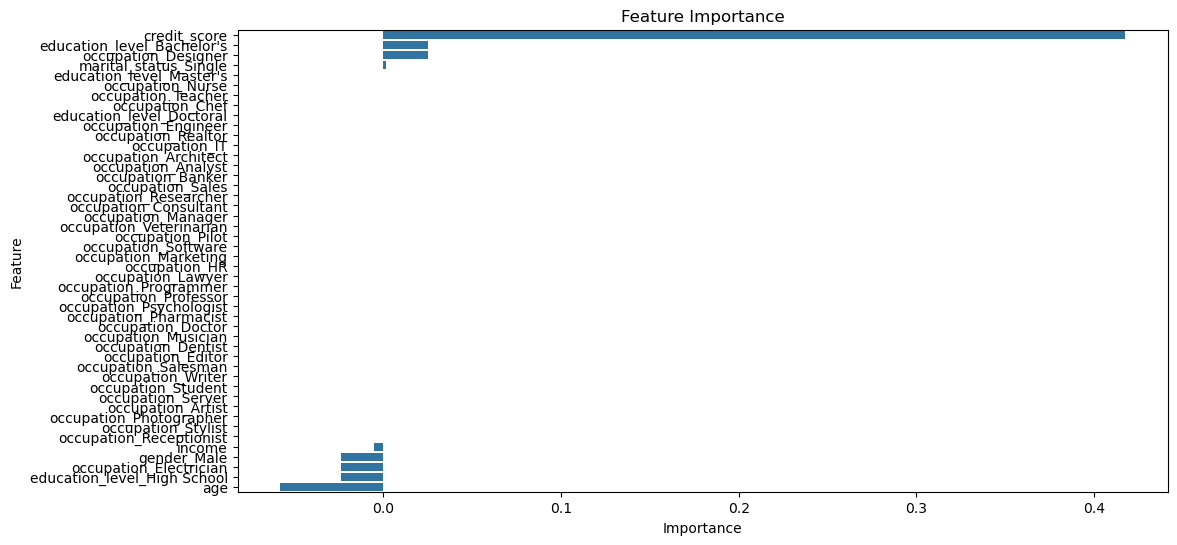

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (12, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.title('Feature Importance')
plt.show()